In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

dataset = pandas.read_csv('hfi_cc_2018.csv')
important_cols = ['year', 'ISO_code', 'countries', 'region']
important_cols += [col for col in dataset.columns if 'pf_identity' in col]
important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [42]:
w_dataset = dataset[important_cols]


## 2.1 Grafiquen la media de la variable pf_identity y hf_score a través de los años.

In [44]:
data = w_dataset[['year','region','pf_identity','hf_score']]
datat = data.dropna()
data.groupby('year')['pf_identity'].apply(numpy.mean)

year
2008    7.517730
2009    7.517730
2010    7.303922
2011    7.467320
2012    7.467320
2013    7.364650
2014    7.387317
2015    7.062893
2016    6.976337
Name: pf_identity, dtype: float64

Text(0, 0.5, 'pf_dentity mean')

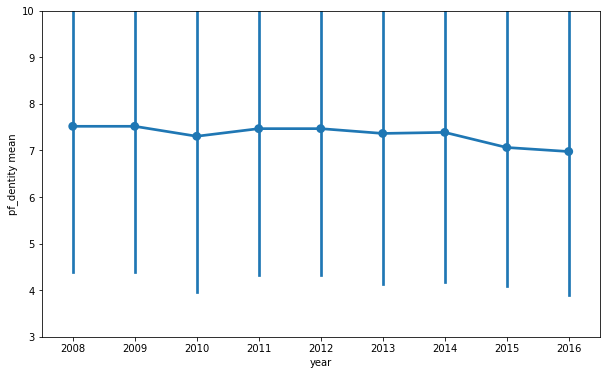

In [45]:
plt.figure(figsize=(10,6))
seaborn.pointplot(data=data,
                  x='year', y='pf_identity', 
                  estimator=numpy.mean, 
                  ci='sd')
plt.ylim(3, 10)
plt.ylabel('pf_dentity mean')


In [46]:
data.groupby('year')['hf_score'].apply(numpy.mean)

year
2008    7.069785
2009    7.075678
2010    7.036396
2011    7.031203
2012    6.985917
2013    6.983139
2014    6.958734
2015    6.932810
2016    6.889871
Name: hf_score, dtype: float64

Text(0, 0.5, 'hf_score mean')

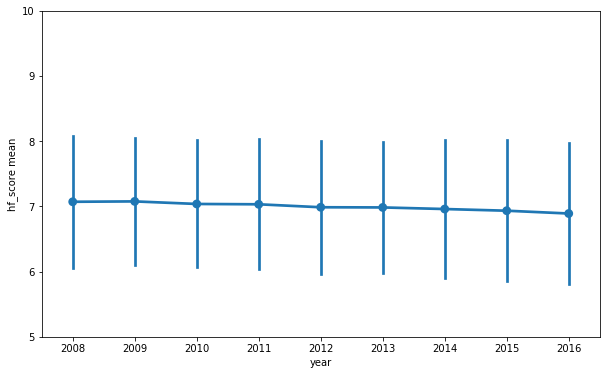

In [47]:
plt.figure(figsize=(10,6))
seaborn.pointplot(data=data,
                  x='year', y='hf_score', 
                  estimator=numpy.mean, 
                  ci='sd')
plt.ylim(5, 10)
plt.ylabel('hf_score mean')

### 2.1 Interpretacion

Se observa una muy tenue tendencia a la baja en ambos valores a medida que pasan los años.

## 2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

Text(0, 0.5, 'pf_identity mean')

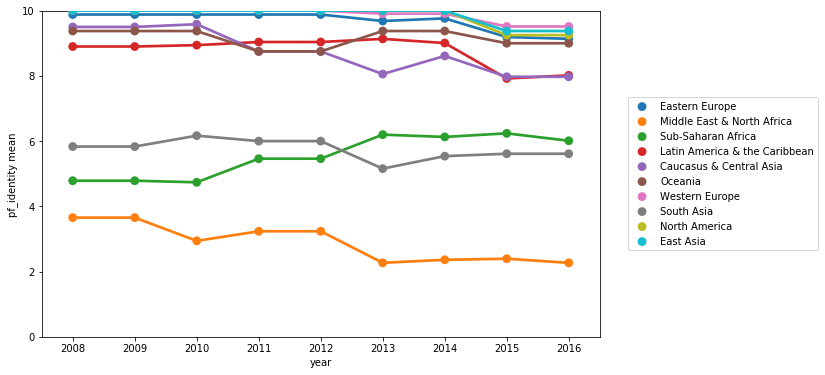

In [70]:
plt.figure(figsize=(10,6))
g = seaborn.pointplot(data=data,
                  x='year', y='pf_identity', 
                  estimator=numpy.mean, 
                  hue='region',
                  ci=None)
g.legend(loc='center right', bbox_to_anchor=(1.40, 0.5), ncol=1)
plt.ylim(0, 10)
plt.ylabel('pf_identity mean')

Text(0, 0.5, 'hf_score mean')

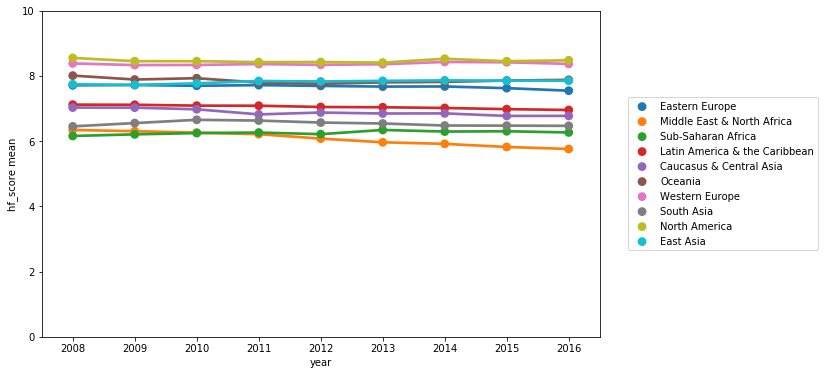

In [69]:
plt.figure(figsize=(10,6))
g = seaborn.pointplot(data=data,
                  x='year', y='hf_score', 
                  estimator=numpy.mean, 
                  hue='region',
                  ci=None)
g.legend(loc='center right', bbox_to_anchor=(1.40, 0.5), ncol=1)
plt.ylim(0, 10)
plt.ylabel('hf_score mean')

### 2.2 Interpretacion

Para la variable pf_identity no se puede disernir si se observa la misma tendencia entre el grafico a nivel mundial y el grafico por regiones, hay algunas regiones que suben, otras que bajan abruptamente y otras que bajan suavemente. Sin embargo para la variable hf_score si se puede observar tendencias similares entre los graficos.

## 2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?